In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('./shoe_sales.csv')
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [56]:
df.shape

(60, 3)

In [57]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [58]:
df[df.sold_qty<12.25]

,date,brand,sold_qty
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
9,9/5/2023,Adidas,10.0
15,9/8/2023,Adidas,8.0
19,9/10/2023,Adidas,7.0
21,9/11/2023,Adidas,9.0
25,9/13/2023,Adidas,11.0
29,9/15/2023,Adidas,10.0
33,9/17/2023,Adidas,8.0
37,9/19/2023,Adidas,7.0


In [59]:
df[df.sold_qty<12.25].shape

(15, 3)

In [60]:
15/60

0.25

In [61]:
df[df.sold_qty<19.75]

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0
11,9/6/2023,Adidas,15.0
12,9/7/2023,Nike,19.0
13,9/7/2023,Adidas,16.0
14,9/8/2023,Nike,17.0


### (1) Nike Analysis

In [62]:
df_nike = df[df.brand == "Nike"] # or df[df['brand'] == "Nike"]
df_nike.shape

(30, 3)

In [63]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [64]:
round(df_nike['sold_qty'].median())

20

Here we can see the max sold nike is 25 and min sold nike is 14 per day and the avg is 20

In [65]:
df_nike[df_nike['sold_qty'].isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


here we have 2 missing values for the date 9th of 17 and 25 2023 respectivly

In [66]:
df_nike['sold_qty'] = df_nike['sold_qty'].fillna(round(df_nike['sold_qty'].median()))
df_nike.isnull().sum()

/var/folders/n6/28ff8fsj0c901jvkhvfb8ylw0000gn/T/ipykernel_1707/2086527085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike['sold_qty'] = df_nike['sold_qty'].fillna(round(df_nike['sold_qty'].median()))


date        0
brand       0
sold_qty    0
dtype: int64

In [67]:
df_nike.loc[32]

date        9/17/2023
brand            Nike
sold_qty         20.0
Name: 32, dtype: object

use `loc` to look into a paticulare index location

In [68]:
df_nike.sold_qty.sum()

np.float64(590.0)

total sold price for nike in sept is 590

### (2) Adidas Analysis

In [69]:
df_adidas = df[df['brand'] == "Adidas"]
df_adidas.shape

(30, 3)

In [70]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


here we have a outlier as the `std` is very high and also the 75 percentil is 15 where as the max is 689

In [71]:
df_adidas.sold_qty.median()

np.float64(12.5)

In [72]:
df_adidas.sold_qty.mean()

np.float64(34.8)

here because we have a outlier the mean is getting effectid and giving an higher value 34.8 where as the median is not effected and it's value is 12.5

In [73]:
df_adidas.sold_qty.sum()

np.float64(1044.0)

as per sept the adidas sold value is 1044

In [74]:
df_adidas['sold_qty'].quantile(0.96)

np.float64(18.84)

as the 96 percent of data have value (sold) is less then 18.84 so we can say as the max is 689 is a outlier and any value more then 18.84 is an outliers

In [75]:
df_adidas[df_adidas['sold_qty'] > df_adidas['sold_qty'].quantile(0.96)]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


In [76]:
import seaborn as sns

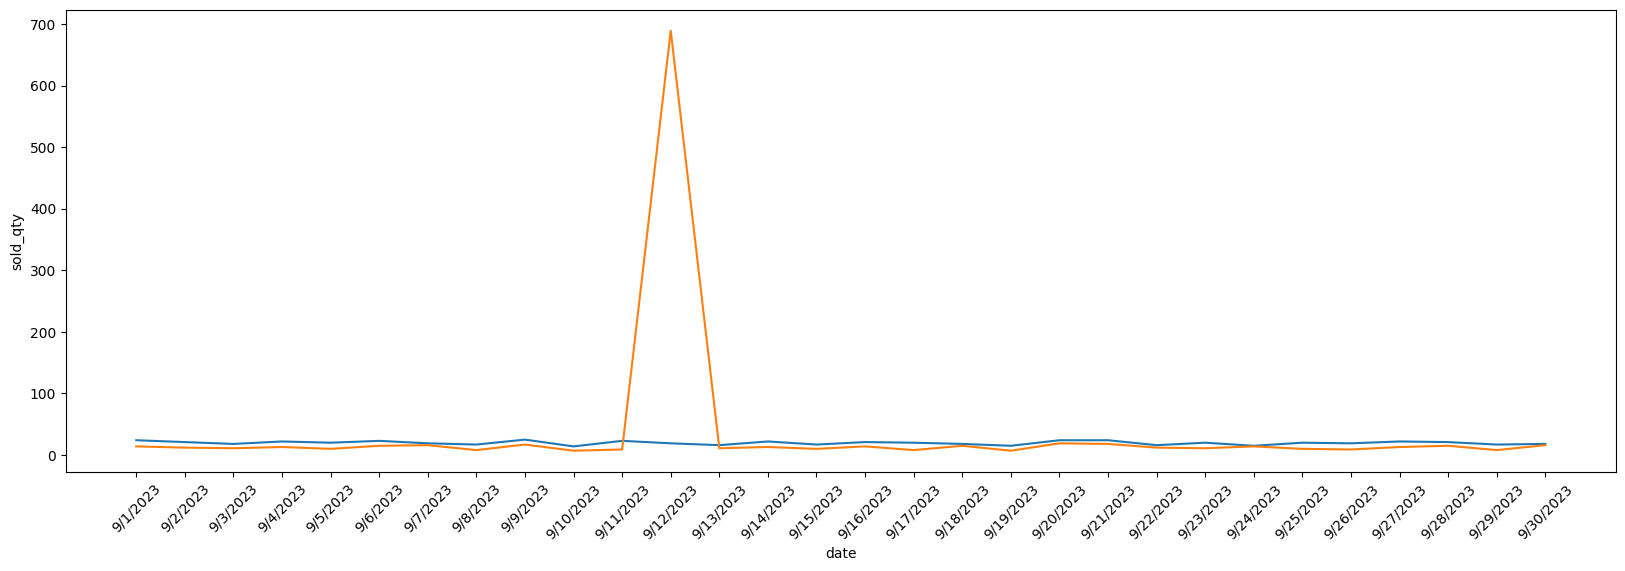

In [77]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_nike,x='date',y='sold_qty',markers='o')
sns.lineplot(data=df_adidas,x='date',y='sold_qty',markers='o')
plt.xticks(rotation=45)
plt.show()

Treat the outlier

In [78]:
val = round(df_adidas['sold_qty'].median())

In [79]:
df_adidas['sold_qty'].replace(689,val,inplace=True)


/var/folders/n6/28ff8fsj0c901jvkhvfb8ylw0000gn/T/ipykernel_1707/3716502040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas['sold_qty'].replace(689,val,inplace=True)
/var/folders/n6/28ff8fsj0c901jvkhvfb8ylw0000gn/T/ipykernel_1707/3716502040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas['sold_qty'].replace(689,val,i

In [81]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,12.233333
std,3.287210
min,7.000000
25%,10.000000
50%,12.000000
75%,14.750000
max,19.000000


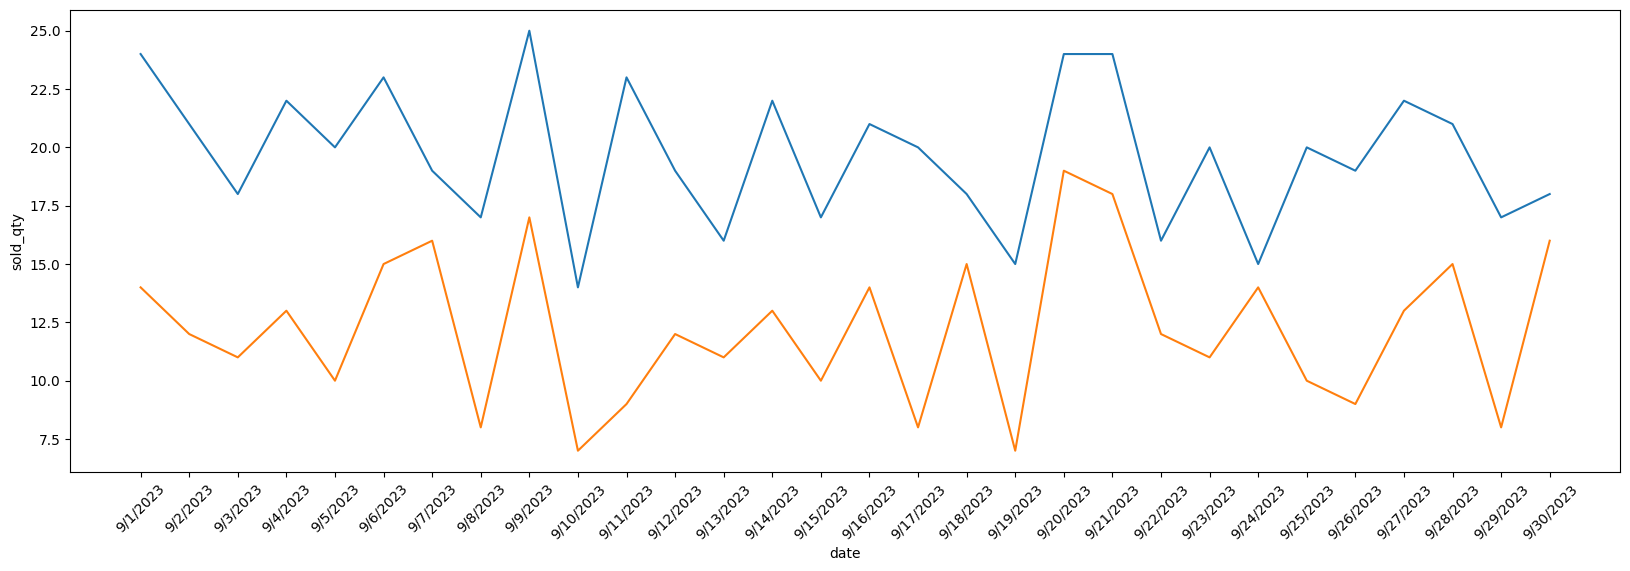

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_nike,x='date',y='sold_qty',markers='o')
sns.lineplot(data=df_adidas,x='date',y='sold_qty',markers='o')
plt.xticks(rotation=45)
plt.show()

Now we can say that Nike is doing better then Adidas

In [83]:
df_adidas['sold_qty'].sum()

np.float64(367.0)